In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_lowpass_filter(order: int) -> np.array:
    """
    Retorna um filtro passa-baixa com a ordem passada.
    """
    return np.ones(shape=(order, order)) * (1/order**2)


def get_laplacian_filter() -> np.array:
    """
    Retorna um filtro laplaciando de ordem 3.
    """
    return np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])


def get_sobel_filter(type: str) -> np.array:
    """
    Retorna um filtro de Sobel de ordem 3.
    """
    if type == 'g1':
        return np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    elif type == 'g2':
        return np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])


def convolution(image: np.array, mask: np.array) -> np.array:
    """
    Aplica a convolução na imagem utilizando a máscara informada.
    """
    # Rotaciona a máscara em 180 graus
    mask = np.flipud(np.fliplr(mask))

    # Pega a ordem da máscara
    order = mask.shape[0]
    half_order = order//2

    # Calcula a imagem resultante
    result = np.zeros(shape=(image.shape))
    image = np.pad(image, half_order)
    M, N = image.shape

    for i in range(0, M - order):
        for j in range(0, N - order):
            result[i, j] = (mask * image[i:i+order, j:j+order]).sum()

    return result

In [4]:
image = plt.imread('../images/lena.tif').astype('uint8')

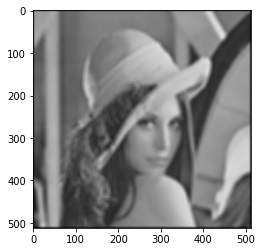

In [11]:
lowpass_mask = get_lowpass_filter(11)
lowpass_filter_image = convolution(image, lowpass_mask)
plt.imshow(lowpass_filter_image, cmap='gray', vmin=0, vmax=255)
plt.show()

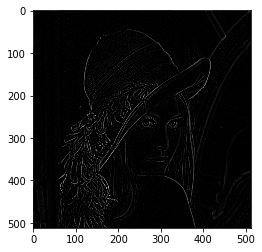

In [12]:
laplacian_mask = get_laplacian_filter()
laplacian_filter_image = convolution(image, laplacian_mask)
plt.imshow(laplacian_filter_image, cmap='gray', vmin=0, vmax=255)
plt.show()

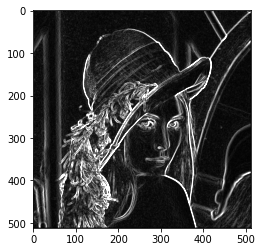

In [13]:
sobel_mask_g1, sobel_mask_g2 = get_sobel_filter('g1'), get_sobel_filter('g2')
sobel_filter_image_g1 = convolution(image, sobel_mask_g1)
sobel_filter_image_g2 = convolution(image, sobel_mask_g2)
sobel_filter_image = np.sqrt(sobel_filter_image_g1**2 + sobel_filter_image_g2**2)
plt.imshow(sobel_filter_image, cmap='gray', vmin=0, vmax=255)
plt.show()

Inicialmente, a convolução retornaria uma imagem com dimensões reduzidas, portanto, utilizamos a adição de um padding (borda com zeros) tendo o tamanho da metade da ordem do filtro aplicado, retornando-se uma imagem com o mesmo tamanho da original.
Nota-se que todos filtros responderam como esperado. O filtro passa-baixa borrou a imagem, foi escolhido um valor elevado para máscara (11x11) para deixar o efeito mais evidente. O filtro laplaciano e de Sobel retornaram os contornos da imagem, valorizando as transições de intensidade presentes na imagem.